## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

## Import Data

In [2]:
raw_csv = pd.read_csv("OTD_Raw.csv")
raw_csv

,Transport Name,Customer Name,Shipping Point,Shipment Number,Ship To Address,Truck Plate,Product Name,Logon Number,Driver Name,First Weighing date,...,Night Driving,Ring,Region,Customer Type,Quantity,Safety Violation,Dispatch Date.1,Truck Plate.1,Delivery Time (In Hours),OTD (IN %)
0,JOZA GLOBAL LOGISTIC LTD,JUDE C. MATHIAS,ABA DEPOT,33652001335,"170, AROCHUKWU ROAD 170 (OHAFIA)",AAA827YA,CEM II /A-L 42.5N - SUPASET-50KG BAG K2,68211271,0,4/3/2020 13:51,...,NO,Ring 1,East,Trade,20.0,NO VIOLATION,4/3/2020,AAA827YA,3.43,14.28%
1,JOZA GLOBAL LOGISTIC LTD,JUDE C. MATHIAS,ABA DEPOT,33652001334,"170, AROCHUKWU ROAD 170 (OHAFIA)",AAA827YA,CEM II /A-L 42.5N - SUPASET-50KG BAG K2,68220143,0,4/2/2020 14:13,...,YES,Ring 1,East,Trade,20.0,NO VIOLATION,4/2/2020,AAA827YA,5.56,23.19%
2,JOZA GLOBAL LOGISTIC LTD,INFOR & BROS NIGERIA LIMITED,ABA DEPOT,33652001342,6 OJIKE/GROTZ LANE,AAA827YA,CEM II /B-L 32.5R - CLASSIC-50KG BAG K2,68232156,0,4/8/2020 11:56,...,NO,Ring 1,East,Trade,20.0,NO VIOLATION,4/8/2020,AAA827YA,4.08,16.99%
3,JOZA GLOBAL LOGISTIC LTD,GLOJOESAM INVESTMENT LTD,ABA DEPOT,33652001360,Uratta Timber Market,AAA827YA,CEM II /A-L 42.5N - SUPASET-50KG BAG K2,68243931,0,4/14/2020 15:56,...,NO,Ring 1,East,Trade,20.0,NO VIOLATION,4/14/2020,AAA827YA,1.12,4.69%
4,JOZA GLOBAL LOGISTIC LTD,VUNIC GLOBAL CONNECT SERVICES,ABA DEPOT,33652001396,OLD EXPRESS ROAD ABA 48 (ABA),AAA827YA,CEM II /A-L 42.5N - SUPASET-50KG BAG K2,68248457,0,4/15/2020 15:45,...,NO,Ring 1,East,Trade,20.0,VIOLATED,4/15/2020,AAA827YA,50.48,210.32%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,JOZA GLOBAL LOGISTIC LTD,TAMARK NIG. LTD,UYO DEPOT,33613003950,NAVAL CHECKPOINT,AGL478XZ,CEM II /B-L 32.5R - CLASSIC-50KG BAG K2,69603518,0,11/13/2020 10:48,...,NO,Ring 1,East,Trade,20.0,VIOLATED,11/13/2020,AGL478XZ,3.24,13.49%
1498,JOZA GLOBAL LOGISTIC LTD,K.E.O MERCHANDISING COMPANY,UYO DEPOT,33613003982,56 RCC ROAD EKET,AGL478XZ,CEM II /B-L 32.5R - CLASSIC-50KG BAG K2,69621099,0,11/18/2020 11:22,...,NO,Ring 1,East,Trade,20.0,VIOLATED,11/18/2020,AGL478XZ,0.72,2.99%
1499,JOZA GLOBAL LOGISTIC LTD,JANNY & SONS VENTURES LIMITED,ENUGU DEPOT,33512005866,B33 NWAGU AGULU BUILDING MKT (AGULU),AGL479XZ,CEM II /A-L 42.5N - SUPASET-50KG BAG K2,67883079,0,2/15/2020 15:09,...,YES,Ring 1,East,Trade,20.0,NO VIOLATION,2/15/2020,AGL479XZ,14.98,62.43%
1500,JOZA GLOBAL LOGISTIC LTD,JANNY & SONS VENTURES LIMITED,ENUGU DEPOT,33512005839,EKWULOBIA BUILDING MATERIAL MKT (EKWULOBIA),AGL479XZ,CEM II /B-L 32.5R - CLASSIC-50KG BAG K2,67882978,0,2/14/2020 15:05,...,YES,Ring 1,East,Trade,20.0,NO VIOLATION,2/14/2020,AGL479XZ,16.72,69.65%


## Drop Unneeded Columns

In [3]:
df = raw_csv.drop(['Transport Name', 'Customer Name', 'Shipment Number', 'Ship To Address', 'Truck Plate', 
                   'Product Name', 'Logon Number', 'Driver Name', 'Region', 'First Weighing date', 'Arrival Date And Time',
                   'Ring', 'Dispatch Date', 'Truck Plate.1', 'OTD (IN %)'], axis = 1)



In [4]:
df['Safety Violation'].unique()

array(['NO VIOLATION', 'VIOLATED'], dtype=object)

In [5]:
df.columns.values

array(['Shipping Point', 'Night Driving', 'Customer Type', 'Quantity',
       'Safety Violation', 'Dispatch Date.1', 'Delivery Time (In Hours)'],
      dtype=object)

## Convert Categorical Variables to Numerical Variables

In [6]:
df['Night Driving'] = df['Night Driving'].map({'YES':1, 'NO':0})

In [7]:
df['Customer Type'] = df['Customer Type'].map({'Key':1, 'Trade':0})

In [8]:
df['Safety Violation'] = df['Safety Violation'].map({'NO VIOLATION':0, 'VIOLATED':1})

## Create a Dummy Variable

In [9]:
Shipping_Point_column = pd.get_dummies(df["Shipping Point"])

In [10]:
df = df.drop(['Shipping Point'], axis=1)

## Join the Dummy Variable Column to the Dataframe

In [11]:
df = pd.concat([df, Shipping_Point_column], axis = 1)

In [12]:
df.columns.values

array(['Night Driving', 'Customer Type', 'Quantity', 'Safety Violation',
       'Dispatch Date.1', 'Delivery Time (In Hours)', 'ABA DEPOT',
       'ENUGU DEPOT', 'MFA', 'Owerri Depot', 'PORT HARCOURT 2 DEPOT',
       'PORT HARCOUT DEPOT', 'UYO DEPOT'], dtype=object)

## Rearrange and Rename the Columns

In [13]:
column_names = ['ABA DEPOT', 'ENUGU DEPOT', 'MFA', 'Owerri Depot', 'PORT HARCOURT 2 DEPOT','PORT HARCOUT DEPOT', 
                'UYO DEPOT', 'Dispatch Date.1', 'Night Driving', 'Customer Type', 'Quantity','Safety Violation', 
                'Delivery Time (In Hours)']

In [14]:
df = df[column_names]

In [15]:
df.rename(columns={'ABA DEPOT' : 'Aba Depot', 'ENUGU DEPOT': 'Enugu Depot', 'MFA' : 'MFA', 'Owerri Depot' : 'Owerri Depot',
                   'PORT HARCOURT 2 DEPOT' : 'Port Harcourt II Depot','PORT HARCOUT DEPOT' : 'Port Harcourt Depot',
                   'UYO DEPOT' : 'Uyo Depot', 'Dispatch Date.1' : 'Dispatch Date', 'Night Driving' : 'Night Driving', 
                   'Customer Type' : 'Customer Type', 'Quantity' : 'Quantity', 'Safety Violation' : 'Safety Violation', 
                   'Delivery Time (In Hours)' : 'Delivery Time'}, inplace=True)

In [16]:
df_origin = df

## Extract Both Month and Weekday From the Dispatch Date into separate columns then Drop the Parent Dispatch Date Column

In [17]:
df_origin['Dispatch Date'] = pd.to_datetime(df_origin['Dispatch Date'], format = '%m/%d/%Y')
df_origin['Dispatch Date']

0      2020-04-03
1      2020-04-02
2      2020-04-08
3      2020-04-14
4      2020-04-15
          ...    
1497   2020-11-13
1498   2020-11-18
1499   2020-02-15
1500   2020-02-14
1501   2020-02-13
Name: Dispatch Date, Length: 1502, dtype: datetime64[ns]

In [18]:
list_months =[]

In [19]:
for i in range(df_origin.shape[0]):
    list_months.append(df_origin['Dispatch Date'][i].month)

In [20]:
df_origin['Month Value'] = list_months
list_months

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 11,
 12,
 12,
 6,
 9,
 9,
 10,
 12,
 5,
 7,
 10,
 10,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 6,
 7,
 7,
 9,
 10,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 5,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 9,
 10,
 11,
 11,
 11,

In [21]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [22]:
df_origin['Day of the week'] = df_origin['Dispatch Date'].apply(date_to_weekday)

In [23]:
df_origin = df_origin.drop(['Dispatch Date'], axis = 1)

In [24]:
column_names_upd = ['Aba Depot', 'Enugu Depot', 'MFA', 'Owerri Depot', 'Port Harcourt II Depot', 
                    'Port Harcourt Depot', 'Uyo Depot', 'Month Value', 'Day of the week','Night Driving', 
                    'Customer Type', 'Quantity', 'Safety Violation', 'Delivery Time']

In [25]:
df_origin_date = df_origin[column_names_upd]

In [26]:
df_preprocessed = df_origin_date.copy()

## Create a preprocessed Data File

In [27]:
df_preprocessed

,Aba Depot,Enugu Depot,MFA,Owerri Depot,Port Harcourt II Depot,Port Harcourt Depot,Uyo Depot,Month Value,Day of the week,Night Driving,Customer Type,Quantity,Safety Violation,Delivery Time
0,1,0,0,0,0,0,0,4,4,0,0,20.0,0,3.43
1,1,0,0,0,0,0,0,4,3,1,0,20.0,0,5.56
2,1,0,0,0,0,0,0,4,2,0,0,20.0,0,4.08
3,1,0,0,0,0,0,0,4,1,0,0,20.0,0,1.12
4,1,0,0,0,0,0,0,4,2,0,0,20.0,1,50.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,0,0,0,0,0,0,1,11,4,0,0,20.0,1,3.24
1498,0,0,0,0,0,0,1,11,2,0,0,20.0,1,0.72
1499,0,1,0,0,0,0,0,2,5,1,0,20.0,0,14.98
1500,0,1,0,0,0,0,0,2,4,1,0,20.0,0,16.72


In [28]:
df = df_preprocessed

## Define a Target

In [29]:
df['Delivery Time'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        3.43
1        5.56
2        4.08
3        1.12
4       50.48
        ...  
1497     3.24
1498     0.72
1499    14.98
1500    16.72
1501    41.15
Name: Delivery Time, Length: 1502, dtype: float64>

In [30]:
targets = np.where(df['Delivery Time'] < 
                   df['Delivery Time'].median(), 1, 0)

In [31]:
targets

array([1, 1, 1, ..., 1, 0, 0])

In [32]:
df['OTD Compliance'] = targets

In [33]:
df.head()

,Aba Depot,Enugu Depot,MFA,Owerri Depot,Port Harcourt II Depot,Port Harcourt Depot,Uyo Depot,Month Value,Day of the week,Night Driving,Customer Type,Quantity,Safety Violation,Delivery Time,OTD Compliance
0,1,0,0,0,0,0,0,4,4,0,0,20.0,0,3.43,1
1,1,0,0,0,0,0,0,4,3,1,0,20.0,0,5.56,1
2,1,0,0,0,0,0,0,4,2,0,0,20.0,0,4.08,1
3,1,0,0,0,0,0,0,4,1,0,0,20.0,0,1.12,1
4,1,0,0,0,0,0,0,4,2,0,0,20.0,1,50.48,0


In [34]:
targets.sum() / targets.shape[0]

0.4993342210386152

In [35]:
df_with_targets = df.drop(['Delivery Time'], axis=1)

In [36]:
df_with_targets.shape

(1502, 14)

## Drop the Target Column

In [37]:
df_with_targets.iloc[:,:-1]

,Aba Depot,Enugu Depot,MFA,Owerri Depot,Port Harcourt II Depot,Port Harcourt Depot,Uyo Depot,Month Value,Day of the week,Night Driving,Customer Type,Quantity,Safety Violation
0,1,0,0,0,0,0,0,4,4,0,0,20.0,0
1,1,0,0,0,0,0,0,4,3,1,0,20.0,0
2,1,0,0,0,0,0,0,4,2,0,0,20.0,0
3,1,0,0,0,0,0,0,4,1,0,0,20.0,0
4,1,0,0,0,0,0,0,4,2,0,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,0,0,0,0,0,0,1,11,4,0,0,20.0,1
1498,0,0,0,0,0,0,1,11,2,0,0,20.0,1
1499,0,1,0,0,0,0,0,2,5,1,0,20.0,0
1500,0,1,0,0,0,0,0,2,4,1,0,20.0,0


In [38]:
unscaled_inputs = df_with_targets.iloc[:,:-1]

In [39]:
from sklearn.preprocessing import StandardScaler
OTD_Compliance_scaler = StandardScaler()

## Create a customized scaler for the Dataframe i.e Omit column which contains zeroes and ones 

In [40]:
class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns):
        
        self.scaler = StandardScaler()
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [41]:
unscaled_inputs.columns.values

array(['Aba Depot', 'Enugu Depot', 'MFA', 'Owerri Depot',
       'Port Harcourt II Depot', 'Port Harcourt Depot', 'Uyo Depot',
       'Month Value', 'Day of the week', 'Night Driving', 'Customer Type',
       'Quantity', 'Safety Violation'], dtype=object)

In [42]:
columns_to_omit = ['Aba Depot', 'Enugu Depot', 'MFA', 'Owerri Depot', 'Port Harcourt II Depot', 
                   'Port Harcourt Depot', 'Uyo Depot', 'Night Driving', 'Customer Type', 'Safety Violation']

In [43]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [44]:
OTD_Compliance_scaler = CustomScaler(columns_to_scale)

In [45]:
OTD_Compliance_scaler.fit(unscaled_inputs)

CustomScaler(columns=['Month Value', 'Day of the week', 'Quantity'])

In [46]:
scaled_inputs = OTD_Compliance_scaler.transform(unscaled_inputs)
scaled_inputs

,Aba Depot,Enugu Depot,MFA,Owerri Depot,Port Harcourt II Depot,Port Harcourt Depot,Uyo Depot,Month Value,Day of the week,Night Driving,Customer Type,Quantity,Safety Violation
0,1,0,0,0,0,0,0,-0.726978,0.826534,0,0,-0.985861,0
1,1,0,0,0,0,0,0,-0.726978,0.268828,1,0,-0.985861,0
2,1,0,0,0,0,0,0,-0.726978,-0.288879,0,0,-0.985861,0
3,1,0,0,0,0,0,0,-0.726978,-0.846585,0,0,-0.985861,0
4,1,0,0,0,0,0,0,-0.726978,-0.288879,0,0,-0.985861,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,0,0,0,0,0,0,1,1.591326,0.826534,0,0,-0.985861,1
1498,0,0,0,0,0,0,1,1.591326,-0.288879,0,0,-0.985861,1
1499,0,1,0,0,0,0,0,-1.389351,1.384241,1,0,-0.985861,0
1500,0,1,0,0,0,0,0,-1.389351,0.826534,1,0,-0.985861,0


In [47]:
scaled_inputs.shape

(1502, 13)

## Eyeball your train and test data 

In [48]:
train_test_split(scaled_inputs, targets)

[      Aba Depot  Enugu Depot  MFA  Owerri Depot  Port Harcourt II Depot  \
 242           0            0    1             0                       0   
 447           1            0    0             0                       0   
 278           1            0    0             0                       0   
 374           1            0    0             0                       0   
 562           0            0    1             0                       0   
 ...         ...          ...  ...           ...                     ...   
 1269          0            1    0             0                       0   
 217           1            0    0             0                       0   
 153           1            0    0             0                       0   
 564           0            0    1             0                       0   
 1157          0            0    1             0                       0   
 
       Port Harcourt Depot  Uyo Depot  Month Value  Day of the week  \
 242           

In [49]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, #train_size = 0.75, 
                                                                            test_size = 0.25, random_state = 15)

In [50]:
print (x_train.shape, y_train.shape)

(1126, 13) (1126,)


In [51]:
print (x_test.shape, y_test.shape)

(376, 13) (376,)


## Define the Series of Models to Use and Compare (Both Numerically and Graphically)

In [52]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.698957 (0.038015)
LDA: 0.698033 (0.036941)
KNN: 0.716688 (0.043374)
CART: 0.721065 (0.041348)
NB: 0.704235 (0.023159)
SVM: 0.705120 (0.025388)


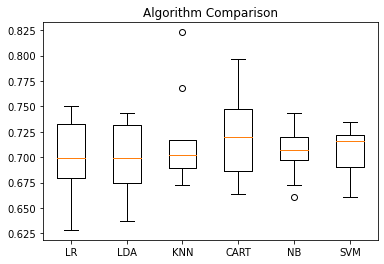

In [53]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Choose the Model with the highest Accuracy and Isolate its Results

In [54]:
KNN = KNeighborsClassifier()

In [55]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
KNN.score(x_train,y_train)

0.8046181172291297

In [57]:
predictions = KNN.predict(x_train)

In [58]:
predictions

array([0, 0, 0, ..., 1, 0, 1])

In [59]:
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

[[443 117]
 [103 463]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       560
           1       0.80      0.82      0.81       566

    accuracy                           0.80      1126
   macro avg       0.80      0.80      0.80      1126
weighted avg       0.80      0.80      0.80      1126



## Create a Model and Scaler File

In [60]:
with open('model1', 'wb') as file:
    pickle.dump(KNN, file)

In [61]:
with open('scaler1','wb') as file:
    pickle.dump(OTD_Compliance_scaler, file)